In [1]:
import pandas as pd
import numpy as np
import os

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_path = '../input/tbx11k-simplified/tbx11k-simplified/'

In [3]:
os.listdir('../input/tbx11k-simplified/tbx11k-simplified')

['images', 'data.csv', 'test']

## Load the data

In [4]:
path = base_path + 'data.csv'

df_data = pd.read_csv(path)

print(df_data.shape)

df_data.head()

(8811, 8)


,fname,image_height,image_width,source,bbox,target,tb_type,image_type
0,h0001.png,512,512,train,none,no_tb,none,healthy
1,h0003.png,512,512,train,none,no_tb,none,healthy
2,h0005.png,512,512,train,none,no_tb,none,healthy
3,h0008.png,512,512,train,none,no_tb,none,healthy
4,h0009.png,512,512,train,none,no_tb,none,healthy


## Filter out the tb images

In [5]:
# Check the target.
# Remember that fnames are not unique because each bbox is on a separate row.
df_data['target'].value_counts()

no_tb    7600
tb       1211
Name: target, dtype: int64

In [6]:
# Filter out the tb images
df_tb = df_data[df_data['target'] == 'tb']

# Reset the index
df_tb = df_tb.reset_index(drop=True)

print(df_tb.shape)

df_tb.head()

(1211, 8)


,fname,image_height,image_width,source,bbox,target,tb_type,image_type
0,tb0005.png,512,512,train,"{'xmin': 381.8337097167969, 'ymin': 126.873390...",tb,active_tb,tb
1,tb0007.png,512,512,train,"{'xmin': 307.3073425292969, 'ymin': 62.0504455...",tb,latent_tb,tb
2,tb0007.png,512,512,train,"{'xmin': 144.12008666992188, 'ymin': 52.934719...",tb,latent_tb,tb
3,tb0012.png,512,512,train,"{'xmin': 307.4519348144531, 'ymin': 81.3111114...",tb,active_tb,tb
4,tb0017.png,512,512,train,"{'xmin': 138.1031036376953, 'ymin': 119.276954...",tb,latent_tb,tb


## Look at a bbox dict

In [7]:
# Look at one bbox dict

bbox_dict = df_tb.loc[0, 'bbox']

# This is actually a str
print(type(bbox_dict))

bbox_dict

<class 'str'>


"{'xmin': 381.8337097167969, 'ymin': 126.8733901977539, 'width': 40.236907958984375, 'height': 44.565773010253906}"

In [8]:
# How to convert the str to a dict

import ast

bbox_dict = ast.literal_eval(bbox_dict)

# The str is now a dict
print(type(bbox_dict))

bbox_dict

<class 'dict'>


{'xmin': 381.8337097167969,
 'ymin': 126.8733901977539,
 'width': 40.236907958984375,
 'height': 44.565773010253906}

## How to draw the bboxes on an image

In [9]:
# Choose a file name
fname = 'tb0021.png'

# Filter by the fname
df = df_tb[df_tb['fname'] == fname]

# Reset the index
df = df.reset_index(drop=True)

# There are two rows so this image has two bboxes
df.head()

,fname,image_height,image_width,source,bbox,target,tb_type,image_type
0,tb0021.png,512,512,train,"{'xmin': 308.87939453125, 'ymin': 64.835807800...",tb,active_tb,tb
1,tb0021.png,512,512,train,"{'xmin': 389.8441467285156, 'ymin': 276.776458...",tb,active_tb,tb


(512, 512, 3)


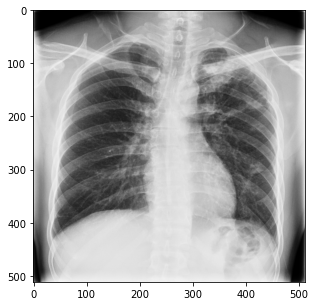

In [10]:
# Load the image

path = base_path + 'images/' + fname

image = plt.imread(path)

print(image.shape)

# Make the image larger
plt.figure(figsize=(5,5))

plt.imshow(image)
plt.show()

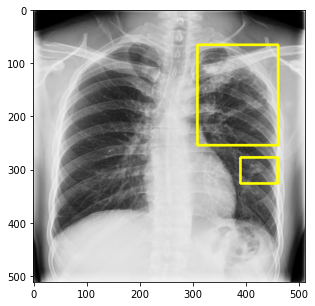

In [11]:
# for each bbox
for i in range(0, len(df)):
    
    bbox_dict = df.loc[i, 'bbox']
    
    # Convert from type str tp type dict
    bbox_dict = ast.literal_eval(bbox_dict)

    # Round each value up and convert it to an integer
    xmin = int(round(bbox_dict['xmin']))
    ymin = int(round(bbox_dict['ymin']))
    height = int(round(bbox_dict['height']))
    width = int(round(bbox_dict['width']))
    
    xmax = xmin + width
    ymax = ymin + height

    # Draw the bbox on the image
    start_point = (xmin, ymin) 
    end_point = (xmax, ymax) 
    bbox_color = (255, 255, 0) 
    bbox_thickness = 3

    # Draw the bbox on the image
    image = cv2.rectangle(image, start_point, end_point, bbox_color, bbox_thickness)

# Display a large image
plt.figure(figsize=(5,5))

plt.imshow(image)
plt.show()

I hope you enjoy using this dataset.